**<font color = black size=6>实验四:模型评估</font>**

**<font color = blue size=4>第一部分:数据集划分</font>**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
import random
warnings.filterwarnings('ignore')

<span style="color:purple">给定一个完整的数据集，尚未划分训练集和测试集，我们需要手动实现训练集和测试集的划分:</span>

<span style="color:purple">我们继续使用iris数据集(iris.csv)，这次我们引入了具有4个特征 (花萼长度($x_1$)，花萼宽度 ($x_2$),花瓣长度 ($x_3$),花瓣宽度 ($x_4$))和两个标签 (Setosa，Versicolour)的100个样本数据，其中每类标签的样本占50%。我们需要将其划分为训练集和测试集，其中测试集中的样本数量占总数量的30%(也就是30个)，且测试集中每个标签的样本各占50%</span>

<span style="color:purple">1) 留出法</span>

<span style="color:purple">我们通过随机选择样本的方式将数据分割为训练集和测试集，并保持两种标签的数据的数量一致</span>

In [171]:
#通过pandas将csv文件转换为dataframe格式后进行操作
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 计算每个类别需要分配给测试集的样本数量的比例，假设为 30%
test_ratio = 0.3

# 计算每个类别需要分配给测试集的样本数量
test_samples_per_class = (labels.value_counts() * test_ratio).astype(int)

# 初始化测试集和训练集
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# 根据标签的分布进行采样
for label, count in test_samples_per_class.items():
    class_samples = df[df['Species'] == label].sample(n=count, random_state=42)
    test_data = test_data.append(class_samples)
    train_data = train_data.append(df[df['Species'] == label].drop(class_samples.index))

# 获取训练集和测试集的特征和标签
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1]
test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1]

# 打印训练集和测试集大小
print("Train data number: ", len(train_data))
print("Test data number: ", len(test_data))

#打印训练集和测试集
print("Train data : ", np.array(train_data))
print("Test data : ", np.array(test_data))

Train data number:  70
Test data number:  30
Train data :  [[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [5.1 3.8 1.9 0.4 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [4.6 3.2 1.4 0.2 0. ]
 [5.  3.3 1.4 0.2 0. ]
 [6.3 3.3 6.  2.5 1. ]
 [5.8 2.7 5.1 1.9 1. ]
 [7.1 3.  5.9 2.1 1. ]
 [7.6 3.  6.6 2.1 1. ]
 [4.9 2.5 4.5 1.7 1. ]
 [7.3 2.9 6.3 1.8 1. 

<span style="color:purple">2) 交叉验证法</span>

<span style="color:purple">我们将数据集分割为k个大小相等且标签数量类似的子数据集，每个迭代中选取一个子数据集作为测试集，剩余k-1个组成训练集，并保持两种标签的数据的数量一致</span>

In [172]:
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 将数据按照标签分为两类
class_0_samples = df[df['Species'] == 0]
class_1_samples = df[df['Species'] == 1]

# 将每一类别的样本随机排序
class_0_samples = class_0_samples.sample(frac=1, random_state=42)
class_1_samples = class_1_samples.sample(frac=1, random_state=42)


# 进行 k 折交叉验证
k = 5

# 初始化训练集和测试集的列表
train_data = []
test_data = []

for i in range(k):
    # 初始化当前折的训练集和测试集
    train_fold = pd.DataFrame()
    test_fold = pd.DataFrame()

    # 计算当前折中每个类别的样本数量
    class_0_fold_size = len(class_0_samples) // k
    class_1_fold_size = len(class_1_samples) // k
    

    # 添加当前折中每个类别的样本到测试集
    test_fold = test_fold.append(class_0_samples[i * class_0_fold_size: (i + 1) * class_0_fold_size])
    test_fold = test_fold.append(class_1_samples[i * class_1_fold_size: (i + 1) * class_1_fold_size])
    
    # 添加剩余样本到训练集
    train_fold = df.drop(test_fold.index)

    # 打乱训练集和测试集的顺序，以便更好的随机性
    train_fold = train_fold.sample(frac=1, random_state=42)
    test_fold = test_fold.sample(frac=1, random_state=42)

    # 将当前折的训练集和测试集添加到列表
    train_data.append(train_fold)
    test_data.append(test_fold)

# 打印每一折的测试集索引，可以看到均为不重复样本
for i in range(k):
    print("第", i+1, "折的测试集: ", (test_data[i].index))

第 1 折的测试集:  Int64Index([13, 75, 98, 39, 32, 48, 89, 45, 82, 76, 95, 30, 19, 69, 17, 80, 25,
            63, 67, 26],
           dtype='int64')
第 2 折的测试集:  Int64Index([12, 96, 56, 4, 47, 6, 54, 8, 97, 91, 58, 37, 15, 65, 3, 87, 46, 62,
            53, 41],
           dtype='int64')
第 3 折的测试集:  Int64Index([9, 77, 50, 16, 33, 0, 66, 34, 83, 94, 84, 24, 5, 55, 31, 74, 27,
            59, 81, 44],
           dtype='int64')
第 4 折的测试集:  Int64Index([29, 85, 52, 11, 23, 2, 61, 1, 73, 93, 51, 36, 40, 90, 21, 86, 35,
            79, 71, 43],
           dtype='int64')
第 5 折的测试集:  Int64Index([10, 64, 57, 22, 28, 7, 72, 49, 78, 92, 99, 18, 38, 88, 20, 68, 14,
            60, 70, 42],
           dtype='int64')


<span style="color:purple">3) 自助法</span>

<span style="color:purple">我们使用有放回采样的方式，每次选取选取一个样本加入到训练集，抽取样本数量(100)次后，将未被选择的样本组成测试集</span>

In [173]:
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 创建自助样本集
num_samples = df.shape[0]
train_data = []
test_data = []

for i in range(num_samples):
    index = random.randint(0, num_samples-1)
    train_data.append(df.iloc[index])

# 创建测试集（排除训练集中已存在的样本）
for _, row in df.iterrows():
    is_in_train_data = False
    for train_row in train_data:
        if row.equals(train_row):
            is_in_train_data = True
            break
    if not is_in_train_data:
        test_data.append(row)

# 打印训练集和测试集大小
print("训练集大小: ", len(train_data))
print("测试集大小: ", len(test_data))


训练集大小:  100
测试集大小:  37


**<font color = blue size=4>第二部分:性能度量</font>**

<span style="color:purple">1) 回归任务:</span>

<span style="color:purple">均方误差(MSE): 计算模型的预测 $\hat{Y}$ 与真实标签 $Y$ 的接近程度</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\},其中$x_i$为样本$i$的特征值,$y_i$为样本$i$的标签值, $f$为训练的模型,该模型$f$在$D$的均方误差为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{(f(x_i)-y_i)^2}$$

<span style="color:purple">2)分类任务:</span>

<span style="color:purple">2.1)错误率: 分类错误样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本$i$的预测标签, 该模型$f$在$D$的错误率为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{Ⅱ(f(x_i)\neq y_i)}$$

<span style="color:purple">2.2)精确率: 分类正确样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签, 该模型$f$在$D$的精度为$$acc(f;D) = \frac{1}{m}\sum_{i=1}^{m}{Ⅱ(f(x_i) = y_i)} = 1 - E(f;D)$$

<span style="color:purple">2.3)查准率和查全率: 正例被预测出来的比率和预测出来的正例中正确的比率</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签.

我们假定该类样本中label为1(正例)和0(反例):

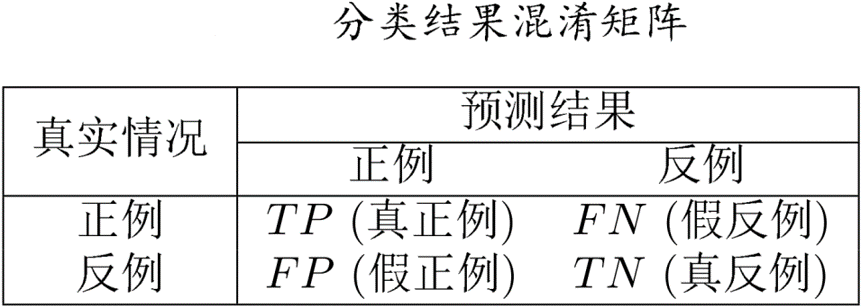

TP(真正例):$$\sum_{i=1}^{m}{Ⅱ(y_i=1 \quad \&\&\quad (f(x_i)= y_i))},$$

FP(假正例):$$\sum_{i=1}^{m}{Ⅱ(y_i=1 \quad \&\&\quad (f(x_i)\neq y_i))},$$

FN(假反例):$$\sum_{i=1}^{m}{Ⅱ(y_i=0 \quad \&\&\quad (f(x_i)\neq y_i))},$$

其中查准率(precision):$$\frac{TP}{TP+FP},$$

查全率(recall):$$\frac{TP}{TP+FN}.$$



<span style="color:purple">2.4)P-R曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，则可以得到查准率-查全率曲线</span>

计算出所有用户的正例可能性:$P(y=1|x;w)$,并进行排序

从高到低以每个用户的正例可能性为【阈值】，根据$\hat{Y}=1$, if $P(y=1|x;w) \geq 【阈值】$，得到一个坐标点(precision,recall)

记录每个坐标点(precision,recall)的F1度量: $F1 = \frac{2*P*R}{P+R}$

最后将得到的所有(precision,recall)画成折线图

给出一个简易的折线图的画图例子

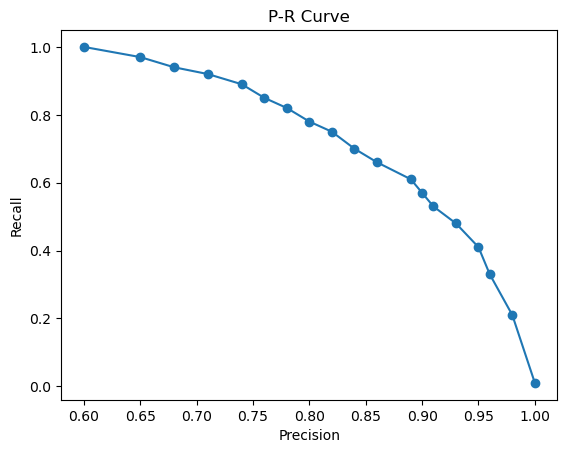

In [174]:
thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
recall     = [1.00, 0.97, 0.94, 0.92, 0.89, 0.85, 0.82, 0.78, 0.75, 0.70, 0.66, 0.61, 0.57, 0.53, 0.48, 0.41, 0.33, 0.21, 0.01]
precision  = [0.60, 0.65, 0.68, 0.71, 0.74, 0.76, 0.78, 0.80, 0.82, 0.84, 0.86, 0.89, 0.9, 0.91, 0.93, 0.95, 0.96, 0.98, 1.00]


plt.plot(precision,recall, marker='o')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('P-R Curve')
plt.show()

<span style="color:purple">2.5)ROC曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，得到一组(FPR,TPR)，进而得到ROC曲线</span>

其中$TPR=\frac{TP}{TP+FN}$,$FPR=\frac{FP}{TN+FP}.$

**<font color = blue size=4>第四部分:课堂实验</font>**

我们引入了一个骨科患者的生物力学特征数据集(illness.csv)，每个患者在数据集中由六个生物力学属性表示，这些属性分别为pelvic_incidence（盆腔发病率）、pelvic_tilt numeric（骨盆倾斜）、lumbar_lordosis_angle（腰椎前凸角）、sacral_slope（骶骨斜率）、pelvic_radius（骨盆桡骨）、pelvic_radius（脊椎滑脱分级), 对应的标签则为是否为椎间盘疝气和脊椎滑脱(normal和abnormal).

该数据集共有310个样本，但并没有划分训练集和测试集.

<span style="color:purple">1)导入数据集,根据数据信息定义逻辑回归的模型</span>

In [175]:
#your code here

#通过pandas将csv文件转换为dataframe格式后进行操作
illness_dataframe = pd.read_csv('illness.csv')
print(illness_dataframe)


     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal  
1       28.995960     114.405

<span style="color:purple">2)请分别使用三种数据划分方式(留出法、交叉验证法、自助法)划分出训练集和测试集</span>

In [176]:
def hold_out_div(csv_name,test_ratio = 0.3,random_seed=42):
    # 参数: 数据集名称csv_name,每个类别需要分配给测试集的样本数量的比例test_ratio和一个随机数种子
    #通过pandas将csv文件转换为dataframe格式后进行操作
    df = pd.read_csv(csv_name)

    #将label标签内容从字符串替换为数值
    df['class'] = df['class'].map({'Abnormal': 0, 'Normal': 1}).fillna(-1)

    # 获取特征和标签列
    features = df.iloc[:, :-1]
    labels = df.iloc[:, -1]

    # 计算每个类别需要分配给测试集的样本数量
    test_samples_per_class = (labels.value_counts() * test_ratio).astype(int)

    # 初始化测试集和训练集
    train_data1 = pd.DataFrame()
    test_data1 = pd.DataFrame()
    
    # 根据标签的分布进行采样
    for label, count in test_samples_per_class.items():
        class_samples = df[df['class'] == label].sample(n=count, random_state=random_seed)
        test_data1 = test_data1.append(class_samples)
        train_data1 = train_data1.append(df[df['class'] == label].drop(class_samples.index))
    
    return train_data1,test_data1

# 调用该函数 获取划分后的训练集和数据集
train_data1,test_data1=hold_out_div('illness.csv')
# 打印训练集和测试集大小
print("Train data number: ", len(train_data1))
print("Test data number: ", len(test_data1))

#打印训练集和测试集
print("Train data : ", np.array(train_data1))
print("Test data : ", np.array(test_data1))

Train data number:  217
Test data number:  93
Train data :  [[ 63.0278175   22.55258597  39.60911701 ...  98.67291675  -0.25439999
    0.        ]
 [ 39.05695098  10.06099147  25.01537822 ... 114.4054254    4.56425864
    0.        ]
 [ 68.83202098  22.21848205  50.09219357 ... 105.9851355   -3.53031731
    0.        ]
 ...
 [ 61.44659663  22.6949683   46.17034732 ... 125.6707246   -2.70787952
    1.        ]
 [ 45.25279209   8.69315736  41.5831264  ... 118.5458418    0.21475017
    1.        ]
 [ 33.84164075   5.07399141  36.64123294 ... 123.9452436   -0.19924909
    1.        ]]
Test data :  [[ 50.81926781  15.40221253  42.52893886  35.41705528 112.192804
   10.86956554   0.        ]
 [ 56.66829282  13.45820343  43.76970978  43.21008939  93.69220863
   21.10812135   0.        ]
 [ 76.32600187  42.39620445  57.19999999  33.92979742 124.267007
   50.12745689   0.        ]
 [ 75.29847847  16.67148361  61.29620362  58.62699486 118.8833881
   31.57582292   0.        ]
 [ 74.37767772  32.0

In [177]:
#交叉验证法
#your code here
def cross_validation_div(csv_name , k = 5, random_seed=42):
    # 参数：数据集名称csv_name , k值 和随机数种子
    df = pd.read_csv(csv_name)

    #将label标签内容从字符串替换为数值
    df['class'] = df['class'].map({'Abnormal': 0, 'Normal': 1}).fillna(-1)

    # 获取特征和标签列
    features = df.iloc[:, :-1]
    labels = df.iloc[:, -1]

    # 将数据按照标签分为两类
    class_0_samples = df[df['class'] == 0]
    class_1_samples = df[df['class'] == 1]

    # 将每一类别的样本随机排序
    class_0_samples = class_0_samples.sample(frac=1, random_state = random_seed)
    class_1_samples = class_1_samples.sample(frac=1, random_state = random_seed)


    # 初始化训练集和测试集的列表
    train_data2 = []
    test_data2 = []

    for i in range(k):
        # 初始化当前折的训练集和测试集
        train_fold = pd.DataFrame()
        test_fold = pd.DataFrame()

        # 计算当前折中每个类别的样本数量
        class_0_fold_size = len(class_0_samples) // k
        class_1_fold_size = len(class_1_samples) // k
        

        # 添加当前折中每个类别的样本到测试集
        test_fold = test_fold.append(class_0_samples[i * class_0_fold_size: (i + 1) * class_0_fold_size])
        test_fold = test_fold.append(class_1_samples[i * class_1_fold_size: (i + 1) * class_1_fold_size])
        
        # 添加剩余样本到训练集
        train_fold = df.drop(test_fold.index)

        # 打乱训练集和测试集的顺序，以便更好的随机性
        train_fold = train_fold.sample(frac=1, random_state=random_seed)
        test_fold = test_fold.sample(frac=1, random_state=random_seed)

        # 将当前折的训练集和测试集添加到列表
        train_data2.append(train_fold)
        test_data2.append(test_fold)

    # 打印每一折的测试集索引，可以看到均为不重复样本
    # for i in range(k):
    #     print("第", i+1, "折的测试集: ", (test_data2[i].index))
    
    return train_data2,test_data2

# 调用该函数 获取划分后的训练集和数据集
train_data2,test_data2=cross_validation_div('illness.csv')

#打印训练集和测试集
print("Train data : ", np.array(train_data2))
print("Test data : ", np.array(test_data2))


Train data :  [[[ 52.41938511  19.01156052  35.87265953 ... 116.5597709    1.6947051
     0.        ]
  [ 53.43292815  15.86433612  37.16593387 ... 120.5675233    5.9885507
     0.        ]
  [ 43.43645061  10.09574326  36.03222439 ... 137.4396942   -3.11445086
     1.        ]
  ...
  [ 69.75666532  19.27929659  48.49999999 ...  96.49136982  51.1696403
     0.        ]
  [ 59.72614016   7.7248726   55.34348527 ... 125.1742214    3.23515922
     1.        ]
  [ 65.66534698  10.54067533  56.48913545 ... 109.1627768   53.93202006
     0.        ]]

 [[ 50.91244034  23.01516931  46.99999999 ... 117.4222591   -2.52670151
     0.        ]
  [ 45.36675362  10.75561143  29.03834896 ... 117.2700675  -10.67587083
     0.        ]
  [ 43.43645061  10.09574326  36.03222439 ... 137.4396942   -3.11445086
     1.        ]
  ...
  [ 54.74177518  12.09507205  40.99999999 ... 117.6432188   40.3823266
     0.        ]
  [ 89.83467631  22.63921678  90.56346144 ... 100.5011917    3.04097326
     1.       

In [178]:
#自助法
#your code here
def bootstrap_div(csv_name):
    df = pd.read_csv(csv_name)

    #将label标签内容从字符串替换为数值
    df['class'] = df['class'].map({'Abnormal': 0, 'Normal': 1}).fillna(-1)
    
    # 获取特征和标签列
    features = df.iloc[:, :-1]
    labels = df.iloc[:, -1]

    # 创建自助样本集
    num_samples = df.shape[0]
    # 初始化训练集和测试集列表
    train_data3 = []
    test_data3 = []

    for i in range(num_samples):
        index = random.randint(0, num_samples-1)
        train_data3.append(df.iloc[index])

    # 创建测试集（排除训练集中已存在的样本）
    for _, row in df.iterrows():
        is_in_train_data = False
        for train_row in train_data3:
            if row.equals(train_row):
                is_in_train_data = True
                break
        if not is_in_train_data:
            test_data3.append(row)
            
    return train_data3,test_data3

# 调用该函数 获取划分后的训练集和数据集
train_data3,test_data3=bootstrap_div('illness.csv')
# 打印训练集和测试集大小
print("训练集大小: ", len(train_data3))
print("测试集大小: ", len(test_data3))
print("训练集:",train_data3)
print("测试集:",test_data3)


训练集大小:  310
测试集大小:  113
训练集: [pelvic_incidence             54.919443
pelvic_tilt numeric          21.062332
lumbar_lordosis_angle        42.200000
sacral_slope                 33.857110
pelvic_radius               125.212716
degree_spondylolisthesis      2.432561
class                         0.000000
Name: 21, dtype: float64, pelvic_incidence             59.785265
pelvic_tilt numeric          17.879323
lumbar_lordosis_angle        59.206461
sacral_slope                 41.905942
pelvic_radius               119.319111
degree_spondylolisthesis     22.123869
class                         0.000000
Name: 86, dtype: float64, pelvic_incidence             66.879211
pelvic_tilt numeric          24.891999
lumbar_lordosis_angle        49.278597
sacral_slope                 41.987212
pelvic_radius               113.477018
degree_spondylolisthesis     -2.005892
class                         0.000000
Name: 29, dtype: float64, pelvic_incidence             44.529051
pelvic_tilt numeric           9.43

<span style="color:purple">3)请分别在三种数据划分方式(留出法、交叉验证法、自助法)所划分出训练集和测试集下训练逻辑回归模型,并测试错误率\精度</span>

[[-1.69152886]
 [-0.62452289]
 [ 0.50491516]
 [ 0.03875524]
 [ 0.66611436]
 [ 0.00979953]
 [-0.18491419]]
梯度下降前的损失: inf
梯度下降后的损失: 0.30843279679617924


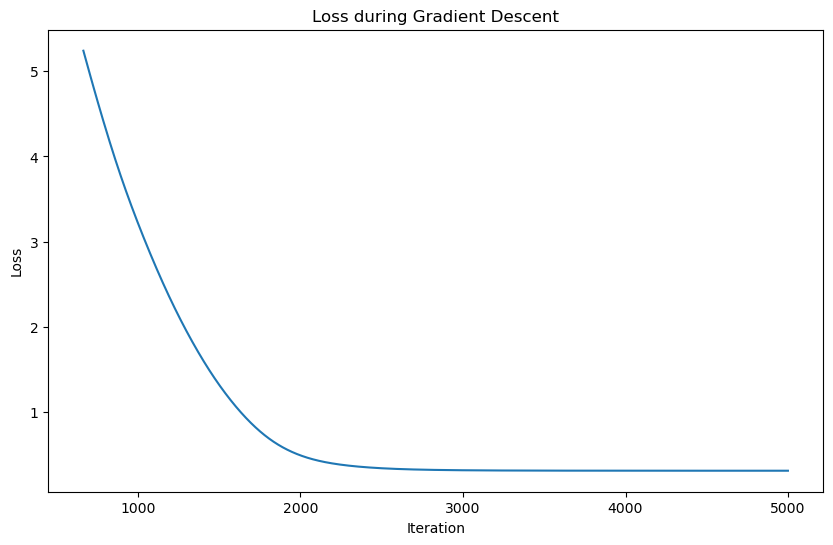

测试错误率: 0.21505376344086022
测试精度: 0.7849462365591398


In [179]:
#留出法测试精度
#your code here

# 定义sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 损失值的计算
def logistic_loss(y, y_pred):
    return -np.mean(np.log(y * (y_pred) + (1 - y) *(1 - y_pred)))

# 定义批量梯度下降函数
def gradient_descent(X, Y, learning_rate, n_iteration):
    m, n = X.shape # 获取样本数量m和维度n
    X = np.insert(X, 0, 1, axis=1) # 添加1到原始数据的最前面
    parameters = np.random.randn(n + 1, 1) # 随机初始化参数
    loss_list = []

    for it in range(n_iteration):
        Y_pred = sigmoid(X @ parameters) # 计算预测值
        loss = logistic_loss(Y, Y_pred)  # 计算损失
        loss_list.append(loss)   # 存储损失
        
        gradients = X.T @ (Y_pred - Y) / m # 计算梯度
        parameters -= learning_rate * gradients # 更新参数

    return parameters, loss_list

# 进行训练

# 获取X
X_train_1=np.array(train_data1)[:,:-1]
# print(X_train_1)
# 获取Y
Y_train_1=np.array(train_data1)[:,-1].reshape(-1,1)
# print(Y_train_1)
# 梯度下降法 获取参数和损失值
parameters_1,losses=gradient_descent(X_train_1,Y_train_1,0.00039,5000)
print(parameters_1)

print("梯度下降前的损失:", losses[0])
print("梯度下降后的损失:", losses[len(losses) - 1])

# 可视化损失值
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss during Gradient Descent")
plt.show()

# 进行测试

# 获取X
X_test_1=np.array(test_data1)[:,:-1]
# print(X_train_1)
# 获取Y
Y_test_1=np.array(test_data1)[:,-1].reshape(-1,1)
# print(Y_train_1)

# 定义预测函数
def predict(X, parameters):
    X = np.insert(X, 0, 1, axis=1)  # 添加1到原始数据的最前面
    Y_pred_prob = sigmoid(X @ parameters)
    Y_pred_label = np.where(Y_pred_prob >= 0.5, 1, 0)  # 将概率转换为类别标签
    return Y_pred_label

# 使用训练好的参数进行预测
Y_pred_1 = predict(X_test_1, parameters_1)

# 计算错误率和精度
error_rate_1 = np.mean(Y_pred_1 != Y_test_1)
accuracy_1 = np.mean(Y_pred_1 == Y_test_1)

print("测试错误率:", error_rate_1)
print("测试精度:", accuracy_1)

# # 重复40次数据集的划分和模型训练、测试
# accuracy_sum_1 = 0 # 初始化精度之和
# n_iterations = 40 # 设置重复次数
# for i in range(n_iterations):
#     # 调用函数重新划分数据集
#     train_data1, test_data1 = hold_out_div('illness.csv',0.3,i) # 每次传入不同的随机数seed

#     # 获取X和Y的训练集
#     X_train_1 = np.array(train_data1)[:,:-1]
#     Y_train_1 = np.array(train_data1)[:,-1].reshape(-1,1)
    
#     # 梯度下降法 获取参数和损失值
#     parameters_1, losses = gradient_descent(X_train_1, Y_train_1, 0.00039, 5000)
    
#     # 获取X和Y的测试集
#     X_test_1 = np.array(test_data1)[:,:-1]
#     Y_test_1 = np.array(test_data1)[:,-1].reshape(-1,1)
    
#     # 使用训练好的参数进行预测
#     Y_pred_1 = predict(X_test_1, parameters_1)
    
#     # 计算精度并累加到精度之和
#     accuracy_1 = np.mean(Y_pred_1 == Y_test_1)
#     accuracy_sum_1 += accuracy_1

# # 计算并打印精度的平均值
# average_accuracy_1 = accuracy_sum_1 / n_iterations
# print()
# print("留出法重复40次数据集的划分和模型训练、测试后的平均精度:", average_accuracy_1)

In [180]:
#交叉验证法
#your code here
#每次选用一个子集作为测试集，剩余k-1个子集的并集作为训练集，所以需要每轮都进行测试
#可以使用k个轮次的精度的平均精度作为本方法的最终精度

# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 损失值的计算
def logistic_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# 定义批量梯度下降函数
def gradient_descent(X, Y, learning_rate, n_iteration):
    m, n = X.shape # 获取样本数量m和维度n
    X = np.insert(X, 0, 1, axis=1) # 添加1到原始数据的最前面
    parameters = np.random.randn(n + 1, 1) # 随机初始化参数
    loss_list = []

    for it in range(n_iteration):
        Y_pred = sigmoid(X @ parameters) # 计算预测值
        loss = logistic_loss(Y, Y_pred)  # 计算损失
        loss_list.append(loss)   # 存储损失
        
        gradients = X.T @ (Y_pred - Y) / m # 计算梯度
        parameters -= learning_rate * gradients # 更新参数

    return parameters, loss_list


# 定义预测准确率计算函数
def compute_accuracy(X, Y, parameters):
    X = np.insert(X, 0, 1, axis=1)
    Y_pred = sigmoid(X @ parameters)
    predictions = np.round(Y_pred)
    accuracy = np.mean(predictions == Y.reshape(-1, 1))
    return accuracy

# 初始化平均精度
average_accuracy = 0

# 进行 k 折交叉验证 之前已经定义过这个变量
k = 5

# 对每一折的数据进行训练和测试
for i in range(k):
    # 获取训练集和测试集
    train_data_temp = train_data2[i]
    test_data_temp = test_data2[i]
    
    # 获取X和Y
    X_train_2 = np.array(train_data_temp)[:, :-1]
    Y_train_2 = np.array(train_data_temp)[:, -1].reshape(-1,1)
    X_test_2 = np.array(test_data_temp)[:, :-1]
    Y_test_2 = np.array(test_data_temp)[:, -1].reshape(-1,1)
    
    # 使用批量梯度下降训练模型
    parameters, losses = gradient_descent(X_train_2, Y_train_2, 0.0005, 3000)

    # 可视化损失值
    # plt.figure(figsize=(10, 6))
    # plt.plot(losses)
    # plt.xlabel("Iteration")
    # plt.ylabel("Loss")
    # plt.title("Loss during Gradient Descent")
    # plt.show()
    
    # 计算测试集上的准确率
    accuracy = compute_accuracy(X_test_2, Y_test_2, parameters)
    average_accuracy += accuracy
    
    print(f"第 {i+1} 折的准确率: {accuracy}")

# 计算k折交叉验证的平均准确率
average_accuracy /= k
print("平均准确率:", average_accuracy)


# # 重复40次数据集的划分和模型训练、测试
# accuracy_sum_2 = 0 # 初始化精度之和
# n_iterations = 40 # 设置重复次数

# for i in range(n_iterations):
#     train_data2,test_data2=cross_validation_div("illness.csv" , 5 , i)
#     # 进行 k 折交叉验证 之前已经定义过这个变量
#     k = 5
#     average_accuracy = 0  # 注意要设置为0 
#     # 对每一折的数据进行训练和测试
#     for i in range(k):
#         # 获取训练集和测试集
#         train_data_temp = train_data2[i]
#         test_data_temp = test_data2[i]
        
#         # 获取X和Y
#         X_train_2 = np.array(train_data_temp)[:, :-1]
#         Y_train_2 = np.array(train_data_temp)[:, -1].reshape(-1,1)
#         X_test_2 = np.array(test_data_temp)[:, :-1]
#         Y_test_2 = np.array(test_data_temp)[:, -1].reshape(-1,1)
        
#         # 使用批量梯度下降训练模型
#         parameters, _ = gradient_descent(X_train_2, Y_train_2, 0.0005, 3000)
        
#         # 计算测试集上的准确率
#         accuracy = compute_accuracy(X_test_2, Y_test_2, parameters)
#         average_accuracy += accuracy
        
#     # 计算k折交叉验证的平均准确率
#     average_accuracy /= k
#     accuracy_sum_2+=average_accuracy # 进行准确率的叠加
# # 计算平均后的结果
# average_accuracy_2=accuracy_sum_2/n_iterations
# print()
# print("k折交叉验证法重复40次数据集的划分和模型训练、测试后的平均精度:", average_accuracy_2)

第 1 折的准确率: 0.8064516129032258
第 2 折的准确率: 0.8225806451612904
第 3 折的准确率: 0.8064516129032258
第 4 折的准确率: 0.8225806451612904
第 5 折的准确率: 0.8709677419354839
平均准确率: 0.8258064516129032


[[ 0.04442961]
 [ 0.04999186]
 [-0.20608839]
 [ 0.01983629]
 [-0.01710716]
 [ 0.0090957 ]
 [-0.14834606]]
梯度下降前的损失: inf
梯度下降后的损失: 0.34587524003741


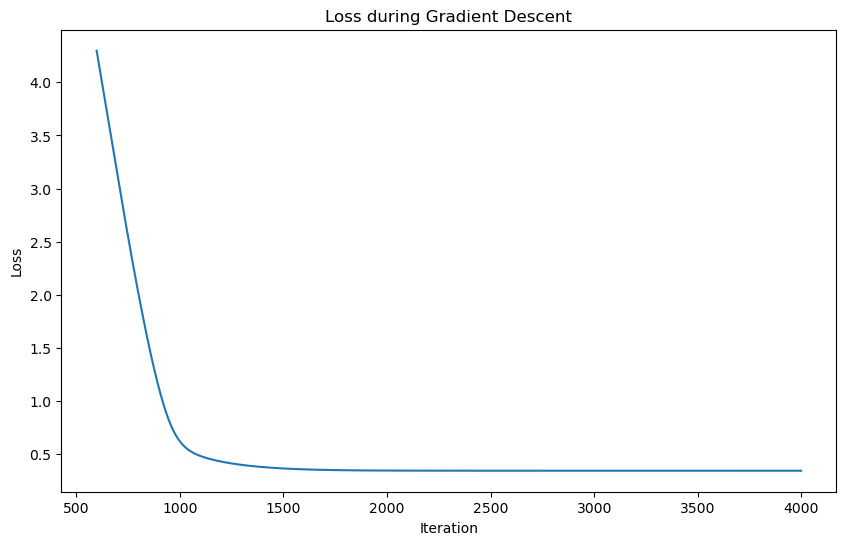

测试集错误率: 0.1504424778761062
测试集精度: 0.8495575221238938


In [181]:
#自助法测试精度

# 定义sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 损失值的计算
def logistic_loss(y, y_pred):
    return -np.mean(np.log(y * (y_pred) + (1 - y) *(1 - y_pred)))

# 定义批量梯度下降函数
def gradient_descent(X, Y, learning_rate, n_iteration):
    m, n = X.shape # 获取样本数量m和维度n
    X = np.insert(X, 0, 1, axis=1) # 添加1到原始数据的最前面
    parameters = np.random.randn(n + 1, 1) # 随机初始化参数
    loss_list = []

    for it in range(n_iteration):
        Y_pred = sigmoid(X @ parameters) # 计算预测值
        loss = logistic_loss(Y, Y_pred)  # 计算损失
        loss_list.append(loss)   # 存储损失
        
        gradients = X.T @ (Y_pred - Y) / m # 计算梯度
        parameters -= learning_rate * gradients # 更新参数

    return parameters, loss_list

# 进行训练

# 转换train_data3为DataFrame
train_data3 = pd.DataFrame(train_data3)

# 从训练集中提取特征矩阵X和标签Y
X_train_3 = np.array(train_data3)[:,:-1]
Y_train_3 = np.array(train_data3)[:,-1].reshape(-1,1)

parameters_3,losses_3=gradient_descent(X_train_3,Y_train_3,0.00065,4000)
print(parameters_3)

print("梯度下降前的损失:", losses_3[0])
print("梯度下降后的损失:", losses_3[len(losses_3) - 1])

# 可视化损失值
plt.figure(figsize=(10, 6))
plt.plot(losses_3)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss during Gradient Descent")
plt.show()

# 进行测试

# 转换test_data3为DataFrame
test_data3 = pd.DataFrame(test_data3)
# 从测试集中提取特征矩阵X和标签Y
X_test_3 = np.array(test_data3)[:,:-1]
Y_test_3 = np.array(test_data3)[:,-1].reshape(-1,1)

# 定义预测函数
def predict(X, parameters):
    X = np.insert(X, 0, 1, axis=1)  # 添加1到原始数据的最前面
    Y_pred_prob = sigmoid(X @ parameters)
    Y_pred_label = np.where(Y_pred_prob >= 0.5, 1, 0)  # 将概率转换为类别标签
    return Y_pred_label

# 使用训练好的参数进行预测
Y_pred_3 = predict(X_test_3, parameters_3)

# 计算错误率和精度
error_rate_3 = np.mean(Y_pred_3 != Y_test_3)
accuracy_3 = np.mean(Y_pred_3 == Y_test_3)

print("测试集错误率:", error_rate_3)
print("测试集精度:", accuracy_3)


# # 重复20次数据集的划分和模型训练、测试
# accuracy_sum_3 = 0 # 初始化精度之和
# # n_iterations = 20 # 设置重复次数
# for it in range(n_iterations):
#     train_data3,test_data3 = bootstrap_div("illness.csv")

#     # 转换train_data3为DataFrame
#     train_data3 = pd.DataFrame(train_data3)

#     # 从训练集中提取特征矩阵X和标签Y
#     X_train_3 = np.array(train_data3)[:,:-1]
#     Y_train_3 = np.array(train_data3)[:,-1].reshape(-1,1)

#     parameters_3,_=gradient_descent(X_train_3,Y_train_3,0.00065,4000)
#     # 进行测试
    
#     # 转换test_data3为DataFrame
#     test_data3 = pd.DataFrame(test_data3)
#     # 从测试集中提取特征矩阵X和标签Y
#     X_test_3 = np.array(test_data3)[:,:-1]
#     Y_test_3 = np.array(test_data3)[:,-1].reshape(-1,1)

#     # 使用训练好的参数进行预测
#     Y_pred_3 = predict(X_test_3, parameters_3)

#     # 计算错误率和精度
#     error_rate_3 = np.mean(Y_pred_3 != Y_test_3)
#     accuracy_3 = np.mean(Y_pred_3 == Y_test_3)
#     accuracy_sum_3 += accuracy_3 # 进行累加
# # 计算平均后的结果
# average_accuracy_3=accuracy_sum_3/n_iterations
# print()
# print("自助法重复50次数据集的划分和模型训练、测试后的平均精度:", average_accuracy_3)


<span style="color:purple">4)按照错误率\精度的性能指标判断出性能【最好】和性能【最差】的数据划分方式</span>

In [182]:
#your code here

def model_evaluation(method, filename, *args):
    accuracy_sum = 0  # 初始化精度和
    n_iterations = 40 # 迭代求取平均值的次数
    
    for i in range(n_iterations):
        if method == 'hold_out':
            train_data, test_data = hold_out_div(filename, args[0], i)
        elif method == 'cross_validation':
            train_data, test_data = cross_validation_div(filename, args[0], i)
        elif method == 'bootstrap':
            train_data, test_data = bootstrap_div(filename)
            # 将获得的训练集和测试集转换为 DataFrame 格式
            train_data = pd.DataFrame(train_data)
            test_data = pd.DataFrame(test_data)
        else:
            raise ValueError("Invalid method")
        
        # 对于交叉验证方法，需计算每一折的平均精度
        if method == 'cross_validation':
            average_accuracy = 0
            k = args[0]
            for i in range(k):
                # 交叉验证法要对每一折进行训练和测试 以求取平均值
                train_data_temp = train_data[i]
                test_data_temp = test_data[i]
                X_train = np.array(train_data_temp)[:, :-1]
                Y_train = np.array(train_data_temp)[:, -1].reshape(-1,1)
                parameters, _ = gradient_descent(X_train, Y_train, args[1], args[2])
                X_test = np.array(test_data_temp)[:, :-1]
                Y_test = np.array(test_data_temp)[:, -1].reshape(-1, 1)
                
                # 计算测试集上的准确率
                accuracy = compute_accuracy(X_test, Y_test, parameters)
                average_accuracy += accuracy
            average_accuracy /= k
            accuracy_sum += average_accuracy
        else:
            # 从训练集中提取特征矩阵X和标签Y
            X_train = np.array(train_data)[:, :-1]
            Y_train = np.array(train_data)[:, -1].reshape(-1, 1)
            # 使用梯度下降法获取参数
            parameters, _ = gradient_descent(X_train, Y_train, args[1], args[2])
            # 从测试集中提取特征矩阵X和标签Y
            X_test = np.array(test_data)[:, :-1]
            Y_test = np.array(test_data)[:, -1].reshape(-1, 1)
            # 计算测试集上的准确率
            accuracy=compute_accuracy(X_test,Y_test,parameters)
            accuracy_sum += accuracy
    
    # 计算平均后的结果
    average_accuracy = accuracy_sum / n_iterations
    return average_accuracy

# 通过调用函数，传入不同的参数，得到不同划分方法的平均精度
average_accuracy_1 = model_evaluation('hold_out', 'illness.csv', 0.3, 0.00039, 5000)
average_accuracy_2 = model_evaluation('cross_validation', 'illness.csv', 5, 0.0005, 3000)
average_accuracy_3 = model_evaluation('bootstrap', 'illness.csv', None, 0.00065, 4000)

print("(40次迭代求平均)留出法精度:",average_accuracy_1)
print("(40次迭代求平均)交叉验证法平均精度:",average_accuracy_2)
print("(40次迭代求平均)自助法精度:",average_accuracy_3)

# 创建一个字典，将每种数据划分方法的名称映射到其准确率
accuracies = {
    "留出法": average_accuracy_1,
    "交叉验证法": average_accuracy_2,
    "自助法": average_accuracy_3
}

# 找到准确率最高和最低的数据划分方法
best_method = max(accuracies, key=accuracies.get)
worst_method = min(accuracies, key=accuracies.get)
print()

# 打印结果
print("性能【最好】的数据划分方式是:", best_method)
print("性能【最差】的数据划分方式是:", worst_method)

(40次迭代求平均)留出法精度: 0.8287634408602148
(40次迭代求平均)交叉验证法平均精度: 0.8144354838709678
(40次迭代求平均)自助法精度: 0.8172944631827527

性能【最好】的数据划分方式是: 留出法
性能【最差】的数据划分方式是: 交叉验证法


<span style="color:purple">5)在【留出法】和【自助法】中选出性能更好的数据划分方式，画出其对应的P-R曲线和ROC曲线,并计算各个点的F1度量</span>

In [183]:
#your code here
#选择一种数据划分方法

# 选择数据划分方式为【自助法】
# 考虑到考虑问题的特性，数据集较小，自助法可能更合适，因为它允许训练集中的样本重复出现，从而使用了全部的数据。
# 由于划分的随机性 选择计算出均值 以更加准确地判断性能更好的数据划分方式





各点的F1度量: [0.05128205128205127, 0.1, 0.14634146341463414, 0.1904761904761905, 0.23255813953488372, 0.22727272727272727, 0.26666666666666666, 0.30434782608695654, 0.3404255319148936, 0.375, 0.4081632653061224, 0.43999999999999995, 0.4313725490196079, 0.46153846153846156, 0.4905660377358491, 0.5185185185185185, 0.509090909090909, 0.5357142857142857, 0.5614035087719298, 0.5862068965517242, 0.6101694915254237, 0.6333333333333333, 0.6557377049180327, 0.6451612903225806, 0.6666666666666667, 0.6562500000000001, 0.6769230769230768, 0.6969696969696969, 0.716417910447761, 0.7058823529411765, 0.7246376811594202, 0.742857142857143, 0.7605633802816901, 0.7777777777777778, 0.7671232876712328, 0.7837837837837838, 0.8, 0.7894736842105263, 0.8051948051948051, 0.7948717948717949, 0.7848101265822786, 0.8, 0.8148148148148148, 0.8292682926829269, 0.8192771084337349, 0.8095238095238095, 0.8, 0.7906976744186046, 0.7816091954022989, 0.7954545454545453, 0.7865168539325842, 0.7999999999999999, 0.7912087912087911

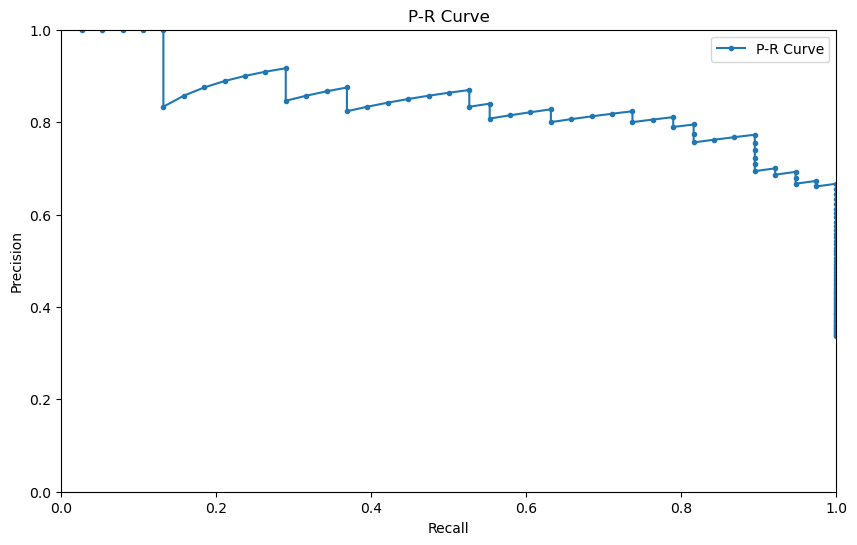

In [184]:
#your code here
#画出P-R曲线

# 定义sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

X_test_3 = np.insert(X_test_3, 0, 1, axis=1)  # 添加1到原始数据的最前面
Y_pred_prob_3 = sigmoid(X_test_3 @ parameters_3).ravel() # 注意转换为一维数组

# 对概率和实际标签按概率值进行降序排序
sorted_indices = np.argsort(Y_pred_prob_3)[::-1] # 获取降序排序后对应元素的索引
Y_pred_prob_3 = Y_pred_prob_3[sorted_indices]
Y_test_3 = Y_test_3[sorted_indices].ravel() # 注意转换为一维数组

# 初始化变量列表
precision_list, recall_list, F1, TPR_list, FPR_list = [], [], [], [], []

for threshold in Y_pred_prob_3:
    # 根据阈值进行分类
    Y_pred = (Y_pred_prob_3 >= threshold).astype(int)
    # 计算TP, FP, TN, FN
    TP = np.sum((Y_pred == 1) & (Y_test_3 == 1))
    FP = np.sum((Y_pred == 1) & (Y_test_3 == 0))
    TN = np.sum((Y_pred == 0) & (Y_test_3 == 0))
    FN = np.sum((Y_pred == 0) & (Y_test_3 == 1))

    # 计算Precision, Recall, F1, TPR(=Recall), FPR
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0
    fpr = FP / (FP + TN) if FP + TN != 0 else 0
    
    precision_list.append(precision)
    recall_list.append(recall)
    F1.append(f1)
    TPR_list.append(recall)
    FPR_list.append(fpr)

print("各点的F1度量:",F1)
# 绘制 P-R 曲线
plt.figure(figsize=(10, 6))
plt.plot(recall_list,precision_list, label='P-R Curve',marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('P-R Curve')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

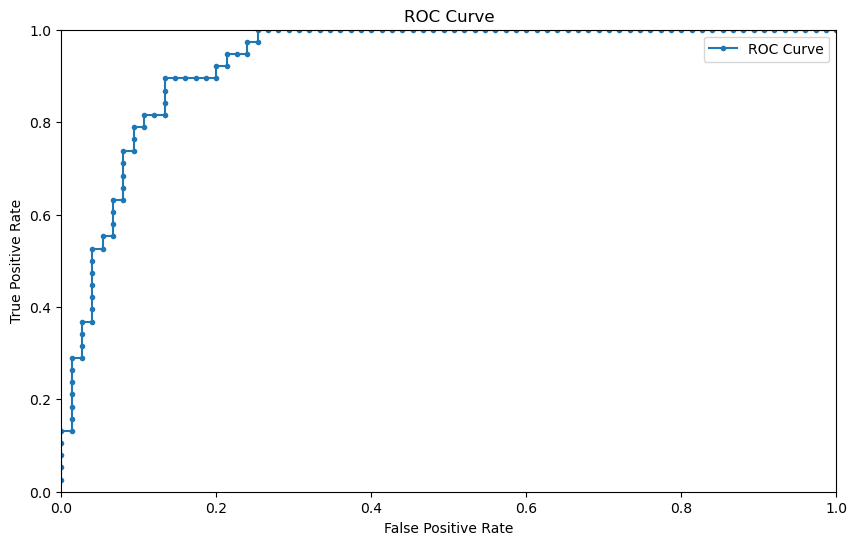

In [185]:
#your code here
#画出ROC曲线

plt.figure(figsize=(10, 6))
plt.plot(FPR_list, TPR_list, label='ROC Curve',marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

**<font color = blue size=4>第五部分:作业提交</font>**

<span style="color:purple">1) 实验报告提交地址 (格式: 学号+姓名+实验四): https://send2me.cn/4-3oEngJ/Qp-icPERnYPjPQ ,
    下周因为国庆假期所以实验课不上，本次实验报告的截止日期为10.8 14:20</span>

<span style="color:purple">2) 实验课件获取地址: https://www.jianguoyun.com/p/Dae3tZUQp5WhChiClp0FIAA</span>